In [1]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
train = pd.read_csv("../dataset/original/train.csv")
test = pd.read_csv("../dataset/original/x_test.csv")

In [5]:
train.shape

(5719, 11)

In [6]:
test.shape


(300, 10)

In [7]:
def convert_date(df):
    df['Unnamed: 0'] = df['Unnamed: 0'].str.split(" ")
    df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: "-".join(x[1:]))
    df = df.rename(columns={'Unnamed: 0':'Date'})
    df = df.rename(columns={'sales w-1':'salesW_1'})
    df = df.rename(columns={'POS_exposed w-1':'POS_exposedW_1'})
    df = df.rename(columns={'volume_on_promo w-1':'volume_on_promoW_1'})
    df.Date = pd.to_datetime(df.Date)
    return df

In [8]:
df = pd.concat([train, test],sort=False)
df

Unnamed: 0   sku    pack  size (GM)   brand  price  \
0     WE 10 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
1     WE 17 December 2016  2689  SINGLE     395.41  BRAND1   1.15   
2     WE 24 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
3     WE 31 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
4      WE 07 January 2017  2689  SINGLE     395.41  BRAND1   1.16   
5      WE 14 January 2017  2689  SINGLE     395.41  BRAND1   1.16   
6      WE 21 January 2017  2689  SINGLE     395.41  BRAND1   1.16   
7      WE 28 January 2017  2689  SINGLE     395.41  BRAND1   1.16   
8     WE 04 February 2017  2689  SINGLE     395.41  BRAND1   1.16   
9     WE 11 February 2017  2689  SINGLE     395.41  BRAND1   1.16   
10    WE 18 February 2017  2689  SINGLE     395.41  BRAND1   1.16   
11    WE 25 February 2017  2689  SINGLE     395.41  BRAND1   1.16   
12       WE 04 March 2017  2689  SINGLE     395.41  BRAND1   1.13   
13       WE 11 March 2017  2689  SINGLE     395.41  BRAND1   1.11   
14       WE 18 March 2017  2689  SINGLE     395.41  BRAND1   1.10   
15       WE 25 March 2017  2689  SINGLE     395.41  BRAND1   1.10   
16       WE 01 April 2017  2689  SINGLE     395.41  BRAND1   1.10   
17       WE 08 April 2017  2689  SINGLE     395.41  BRAND1   1.11   
18       WE 15 April 2017  2689  SINGLE     395.41  BRAND1   1.13   
19       WE 22 April 2017  2689  SINGLE     395.41  BRAND1   1.12   
20       WE 29 April 2017  2689  SINGLE     395.41  BRAND1   1.12   
21         WE 06 May 2017  2689  SINGLE     395.41  BRAND1   1.12   
22         WE 13 May 2017  2689  SINGLE     395.41  BRAND1   1.12   
23         WE 20 May 2017  2689  SINGLE     395.41  BRAND1   1.12   
24         WE 27 May 2017  2689  SINGLE     395.41  BRAND1   1.11   
25        WE 03 June 2017  2689  SINGLE     395.41  BRAND1   1.10   
26        WE 10 June 2017  2689  SINGLE     395.41  BRAND1   1.11   
27        WE 17 June 2017  2689  SINGLE     395.41  BRAND1   1.12   
28        WE 24 June 2017  2689  SINGLE     395.41  BRAND1   1.12   
29        WE 01 July 2017  2689  SINGLE     395.41  BRAND1   1.12   
..                    ...   ...     ...        ...     ...    ...   
270   WE 16 November 2019   688  SINGLE     125.65  BRAND4   0.41   
271   WE 23 November 2019   688  SINGLE     125.65  BRAND4   0.57   
272   WE 30 November 2019   688  SINGLE     125.65  BRAND4   0.57   
273   WE 07 December 2019   688  SINGLE     125.65  BRAND4   0.56   
274   WE 14 December 2019   688  SINGLE     125.65  BRAND4   0.56   
275       WE 29 June 2019  1206  SINGLE     125.65  BRAND4   0.56   
276       WE 06 July 2019  1206  SINGLE     125.65  BRAND4   0.56   
277       WE 13 July 2019  1206  SINGLE     125.65  BRAND4   0.45   
278       WE 20 July 2019  1206  SINGLE     125.65  BRAND4   0.40   
279       WE 27 July 2019  1206  SINGLE     125.65  BRAND4   0.42   
280     WE 03 August 2019  1206  SINGLE     125.65  BRAND4   0.48   
281     WE 10 August 2019  1206  SINGLE     125.65  BRAND4   0.57   
282     WE 17 August 2019  1206  SINGLE     125.65  BRAND4   0.56   
283     WE 24 August 2019  1206  SINGLE     125.65  BRAND4   0.56   
284     WE 31 August 2019  1206  SINGLE     125.65  BRAND4   0.56   
285  WE 07 September 2019  1206  SINGLE     125.65  BRAND4   0.56   
286  WE 14 September 2019  1206  SINGLE     125.65  BRAND4   0.45   
287  WE 21 September 2019  1206  SINGLE     125.65  BRAND4   0.41   
288  WE 28 September 2019  1206  SINGLE     125.65  BRAND4   0.42   
289    WE 05 October 2019  1206  SINGLE     125.65  BRAND4   0.49   
290    WE 12 October 2019  1206  SINGLE     125.65  BRAND4   0.57   
291    WE 19 October 2019  1206  SINGLE     125.65  BRAND4   0.57   
292    WE 26 October 2019  1206  SINGLE     125.65  BRAND4   0.36   
293   WE 02 November 2019  1206  SINGLE     125.65  BRAND4   0.32   
294   WE 09 November 2019  1206  SINGLE     125.65  BRAND4   0.32   
295   WE 16 November 2019  1206  SINGLE     125.65  BRAND4   0.41   
296   WE 23 N

In [9]:
df = convert_date(df)
df = df.sort_values(['sku','Date'])
#min(df[df.sku==2718].Date)
df

Date   sku    pack  size (GM)   brand  price  POS_exposedW_1  \
665  2016-12-10   144   MULTI     114.23  BRAND2   2.18             NaN   
666  2016-12-17   144   MULTI     114.23  BRAND2   2.00            45.0   
667  2016-12-24   144   MULTI     114.23  BRAND2   2.05            17.0   
668  2016-12-31   144   MULTI     114.23  BRAND2   3.00             2.0   
669  2017-01-07   144   MULTI     114.23  BRAND2   2.99             2.0   
670  2017-01-14   144   MULTI     114.23  BRAND2   3.00             0.0   
671  2017-01-21   144   MULTI     114.23  BRAND2   2.19             0.0   
672  2017-01-28   144   MULTI     114.23  BRAND2   2.00            13.0   
673  2017-02-04   144   MULTI     114.23  BRAND2   2.00            26.0   
674  2017-02-11   144   MULTI     114.23  BRAND2   2.31            37.0   
675  2017-02-18   144   MULTI     114.23  BRAND2   3.00            11.0   
676  2017-02-25   144   MULTI     114.23  BRAND2   3.00             3.0   
677  2017-03-04   144   MULTI     114.23  BRAND2   2.16             0.0   
678  2017-03-11   144   MULTI     114.23  BRAND2   2.00            57.0   
679  2017-03-18   144   MULTI     114.23  BRAND2   2.00            57.0   
680  2017-03-25   144   MULTI     114.23  BRAND2   2.33            52.0   
681  2017-04-01   144   MULTI     114.23  BRAND2   3.49             6.0   
682  2017-04-08   144   MULTI     114.23  BRAND2   3.49             0.0   
683  2017-04-15   144   MULTI     114.23  BRAND2   2.18             0.0   
684  2017-04-22   144   MULTI     114.23  BRAND2   2.00            23.0   
685  2017-04-29   144   MULTI     114.23  BRAND2   2.00            16.0   
686  2017-05-06   144   MULTI     114.23  BRAND2   2.37            11.0   
687  2017-05-13   144   MULTI     114.23  BRAND2   3.49             3.0   
688  2017-05-20   144   MULTI     114.23  BRAND2   3.48             3.0   
689  2017-05-27   144   MULTI     114.23  BRAND2   2.20             0.0   
690  2017-06-03   144   MULTI     114.23  BRAND2   2.00            48.0   
691  2017-06-10   144   MULTI     114.23  BRAND2   2.00            45.0   
692  2017-06-17   144   MULTI     114.23  BRAND2   2.35            56.0   
693  2017-06-24   144   MULTI     114.23  BRAND2   3.87             0.0   
694  2017-07-01   144   MULTI     114.23  BRAND2   3.88             0.0   
...         ...   ...     ...        ...     ...    ...             ...   
1832 2018-12-01  2718  SINGLE     395.41  BRAND1   1.10             3.0   
1833 2018-12-08  2718  SINGLE     395.41  BRAND1   1.10             2.0   
1834 2018-12-15  2718  SINGLE     395.41  BRAND1   1.10             6.0   
1835 2018-12-22  2718  SINGLE     395.41  BRAND1   1.10             3.0   
1836 2018-12-29  2718  SINGLE     395.41  BRAND1   1.11             6.0   
1837 2019-01-05  2718  SINGLE     395.41  BRAND1   1.11             6.0   
1838 2019-01-12  2718  SINGLE     395.41  BRAND1   1.10             7.0   
1839 2019-01-19  2718  SINGLE     395.41  BRAND1   1.11             6.0   
1840 2019-01-26  2718  SINGLE     395.41  BRAND1   1.29             7.0   
1841 2019-02-02  2718  SINGLE     395.41  BRAND1   1.54             0.0   
1842 2019-02-09  2718  SINGLE     395.41  BRAND1   1.53             0.0   
1843 2019-02-16  2718  SINGLE     395.41  BRAND1   1.10             0.0   
1844 2019-02-23  2718  SINGLE     395.41  BRAND1   1.00            36.0   
1845 2019-03-02  2718  SINGLE     395.41  BRAND1   1.00            34.0   
1846 2019-03-09  2718  SINGLE     395.41  BRAND1   1.05            30.0   
1847 2019-03-16  2718  SINGLE     395.41  BRAND1   1.11             7.0   
1848 2019-03-23  2718  SINGLE     395.41  BRAND1   1.11             4.0   
1849 2019-03-30  2718  SINGLE     395.41  BRAND1   1.11             1.0   
1850 2019-04-06  2718  SINGLE     395.41  BRAND1   1.11             1.0   
1851 2019-04-13  2718  SINGLE     395.41  BRAND1   1.11             6.0   
1852 2019-04-20  2718  SINGLE     395.41  BRAND1   1.11             3.0   
1853 2019-04-27  2718  SINGLE     39

# Categorical to Numerical


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.pack = le.fit_transform(df.pack)
le.classes_

array(['MULTI', 'SINGLE'], dtype=object)

In [11]:
df.brand = le.fit_transform(df.brand)
le.classes_

array(['BRAND1', 'BRAND2', 'BRAND3', 'BRAND4', 'BRAND5'], dtype=object)

In [12]:
df = df.astype({'pack':int, 'brand':int})

In [13]:
df.columns
#max(df[df.sku==1608].target)

Index(['Date', 'sku', 'pack', 'size (GM)', 'brand', 'price', 'POS_exposedW_1',
       'volume_on_promoW_1', 'salesW_1', 'scope', 'target'],
      dtype='object')

# Plot

In [251]:
train = df[~df.target.isna()]
train.shape
test = df[df.target.isna()]
test.shape

(300, 11)

In [252]:
price=np.asarray(train[train.sku==144].price)[132]

print(price)
price1=[]

price1.append(price)
price1

3.49


[3.49]

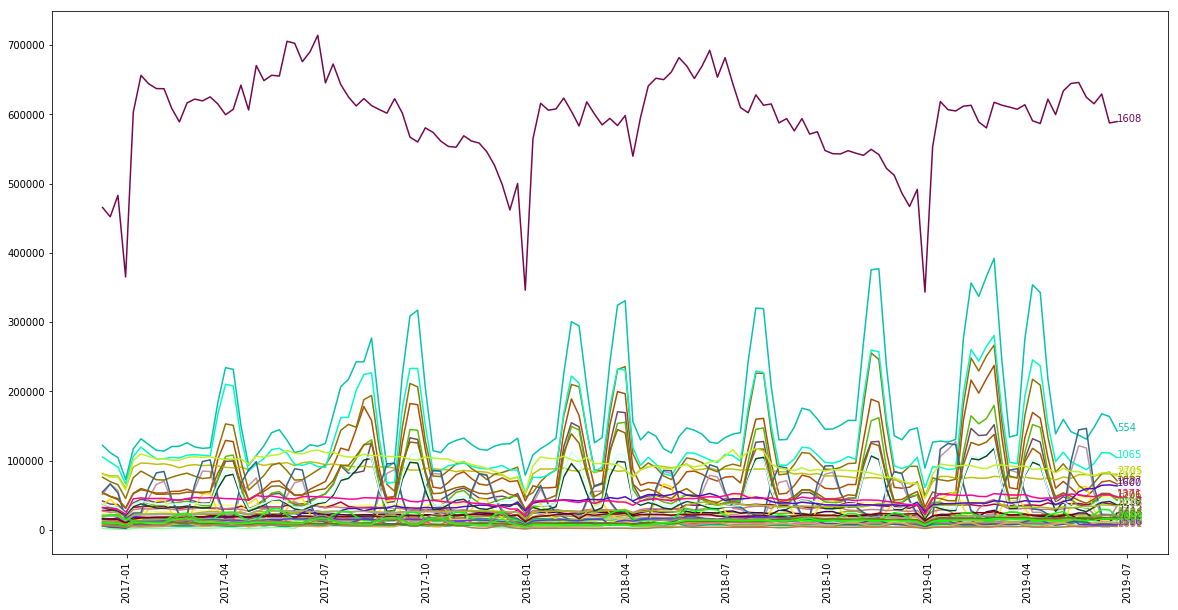

In [14]:
train = train.reset_index()

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

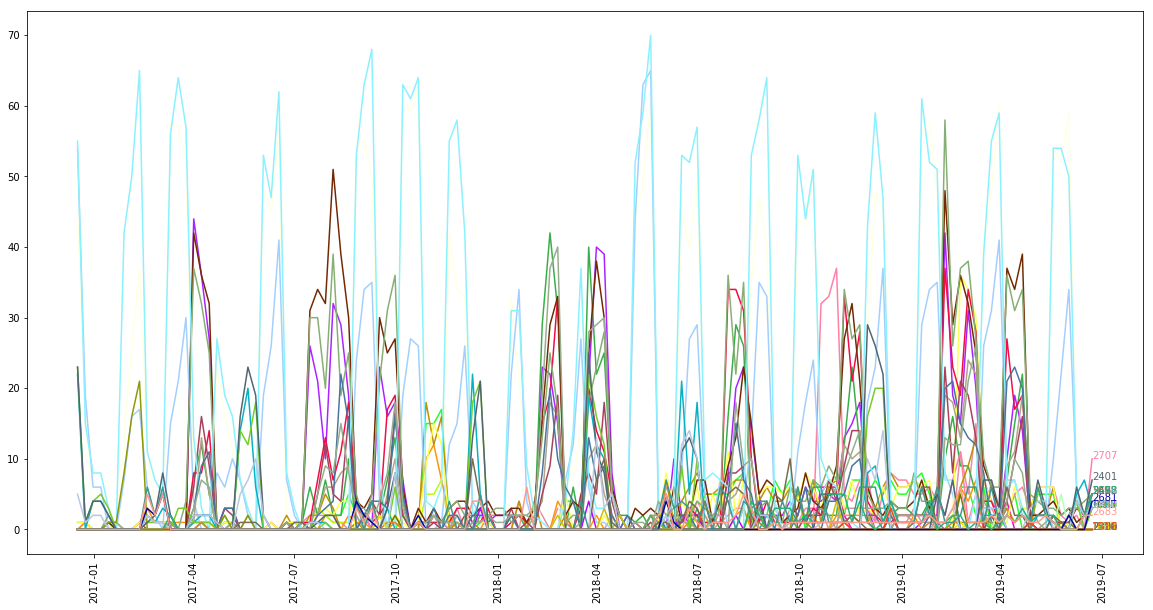

In [15]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].POS_exposedW_1,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].POS_exposedW_1.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

## CLUSTERING

In [16]:
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from scipy.stats import pearsonr


In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [18]:
#s11=(train[train.sku==554].target).values
#s22=(train[train.sku==1065].target).values
#dist=pearsonr(s11,s22)
#dist

In [19]:
#path = dtw.warping_path(s1, s2)
#path1 =dtw.warping_path(s1, s3)
#dtwvis.plot_warping(s1, s2, path)
#dtwvis.plot_warping(s1, s3, path)


In [20]:
#d = dtw.distance_fast(s1, s2)
#d1=dtw.distance_fast(s1, s3)
#print(d,d1)

## DTW DISTANCE

In [18]:
series=[]
for i, s in enumerate(set(train.sku)):
    
    series.append(stats.zscore(((train[train.sku==s].target).values)))

series=np.asarray(series)


In [19]:
z = linkage(series,'single',metric=dtw.distance_fast)

print('z has %d rows'%(z.shape[0]))


z has 42 rows


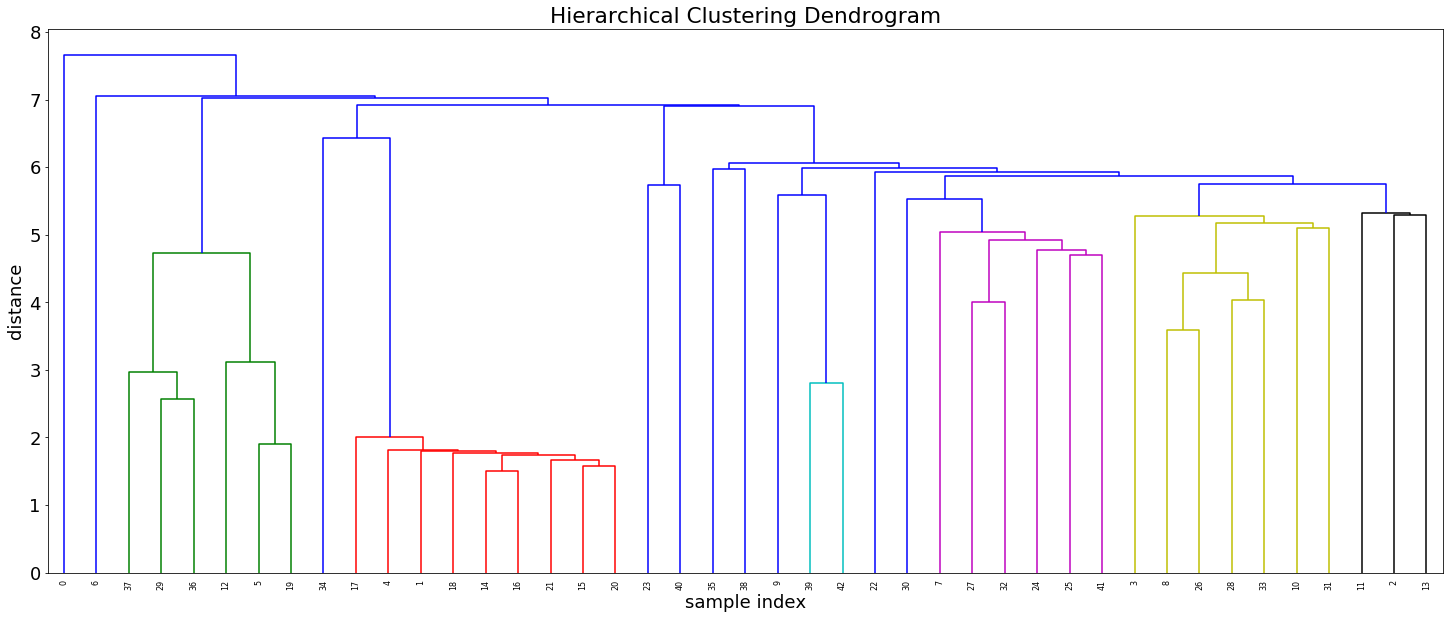

In [20]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## CORRELATION DISTANCE

In [21]:
series1=[]
for i, s in enumerate(set(train.sku)):
    series1.append(((train[train.sku==s].target).values))

series1=np.asarray(series1)

z1= linkage(series1,'single',metric='correlation')
print('z1 has %d rows'%(z1.shape[0]))

z1 has 42 rows


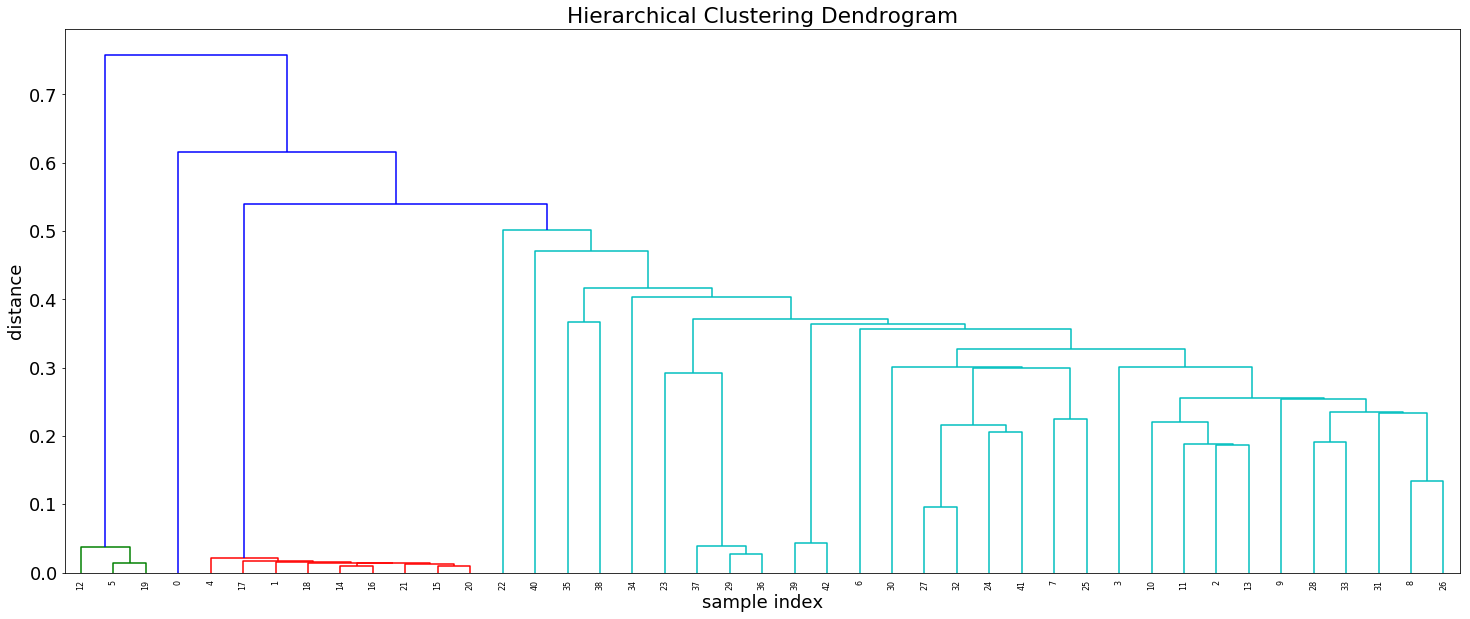

In [22]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z1, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## PEARSON CORRELATION (Non Fa)

In [26]:

series2=[]
for i, s in enumerate(set(train.sku)):
    series2.append(((train[train.sku==s].target).values))

series2=np.asarray(series2)
print (series2)
z2= linkage(series2,'single',metric=pearsonr)
print('z1 has %d rows'%(z1.shape[0]))

[[24175. 23521. 22075. ...  8426.  8246. 13702.]
 [54158. 48676. 45389. ... 69399. 71405. 66337.]
 [14100. 13554. 13173. ... 10870. 10908. 19403.]
 ...
 [ 6175.  6103.  5427. ...  5489.  5530.  5088.]
 [ 9094.  8978.  8570. ... 18312. 18057. 17440.]
 [10192.  9850.  9436. ... 16071. 16265. 15298.]]


ValueError: setting an array element with a sequence.

# Cutted Dendogram 

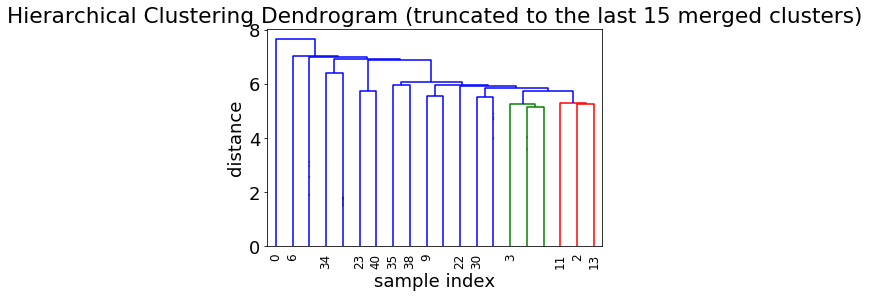

In [26]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 15 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  
    p=20, 
    show_leaf_counts=False, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

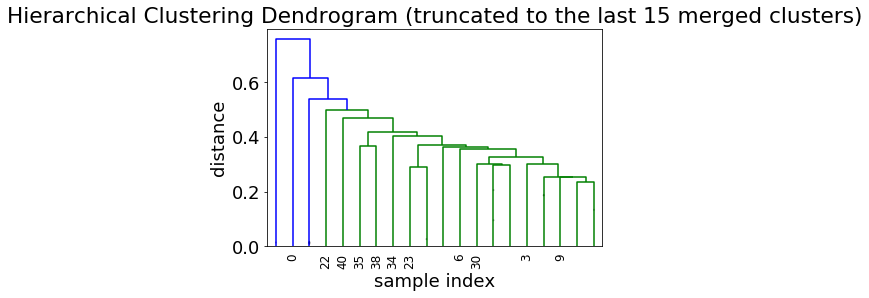

In [27]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 15 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Knee and Elbow Analysis using Correlation

In [23]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z1, k, criterion='maxclust')
    centroids = [np.mean(series1[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(series1, centroids, 'correlation')
    D = cdist(series1, centroids,'correlation')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/series1.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(series1,metric='correlation')**2)/series1.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

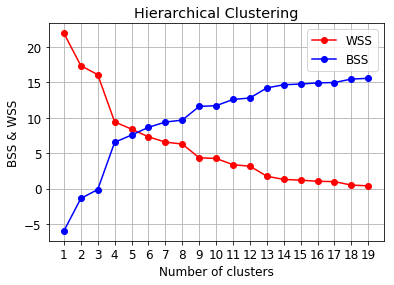

In [24]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

# Knee\Elbow with DTW distance

In [30]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(series[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(series, centroids, metric=dtw.distance_fast)
    D = cdist(series, centroids,metric=dtw.distance_fast)
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/series.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(series,metric=dtw.distance_fast)**2)/series.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

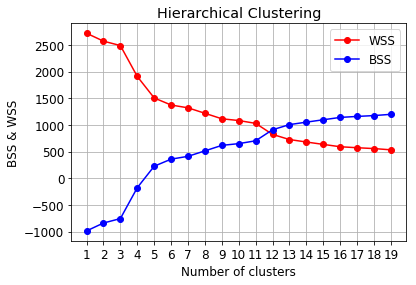

In [31]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

# Clustering plot using Correlation

In [25]:
label_corr=fcluster(z1,4,criterion='maxclust') #Cluster with "correlation distance measure"
sku=list((set(train.sku)))

data={'Label': label_corr,
     'Sku':sku}
df_cluster=pd.DataFrame(data, columns=['Label','Sku'])

#df_cluster

In [26]:
#Timeseries of 1st cluster
cluster1=df_cluster[df_cluster.Label==1].Sku
cluster1=np.asarray(cluster1)
#2 cluster
cluster2=df_cluster[df_cluster.Label==2].Sku
cluster2=np.asarray(cluster2)
#3 cluster
cluster3=df_cluster[df_cluster.Label==3].Sku
cluster3=np.asarray(cluster3)
#4 cluster
cluster4=df_cluster[df_cluster.Label==4].Sku
cluster4=np.asarray(cluster4)


#print (len(cluster1),len(cluster2),len(cluster3),len(cluster4))
cluster=[cluster1,cluster2,cluster3,cluster4]
#print(cluster)

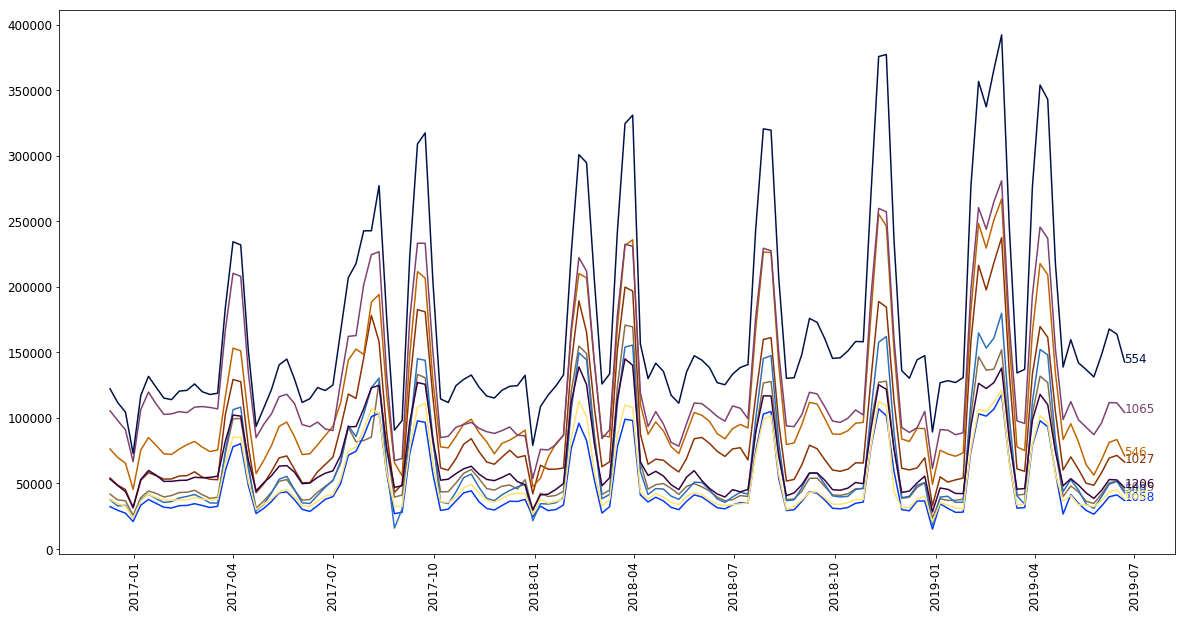

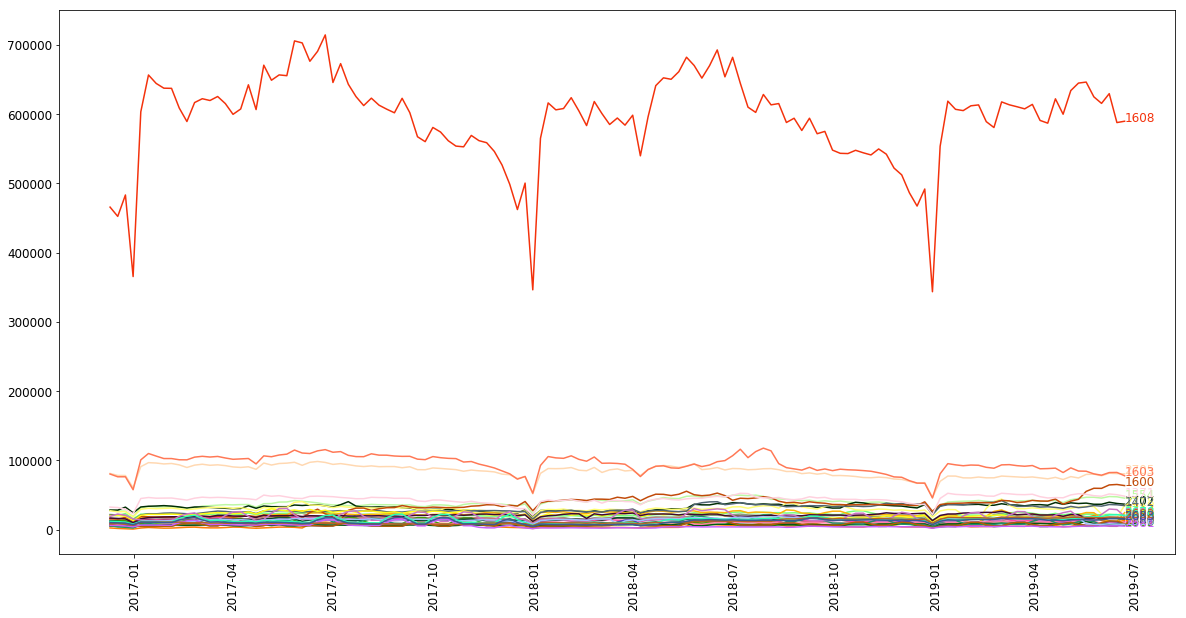

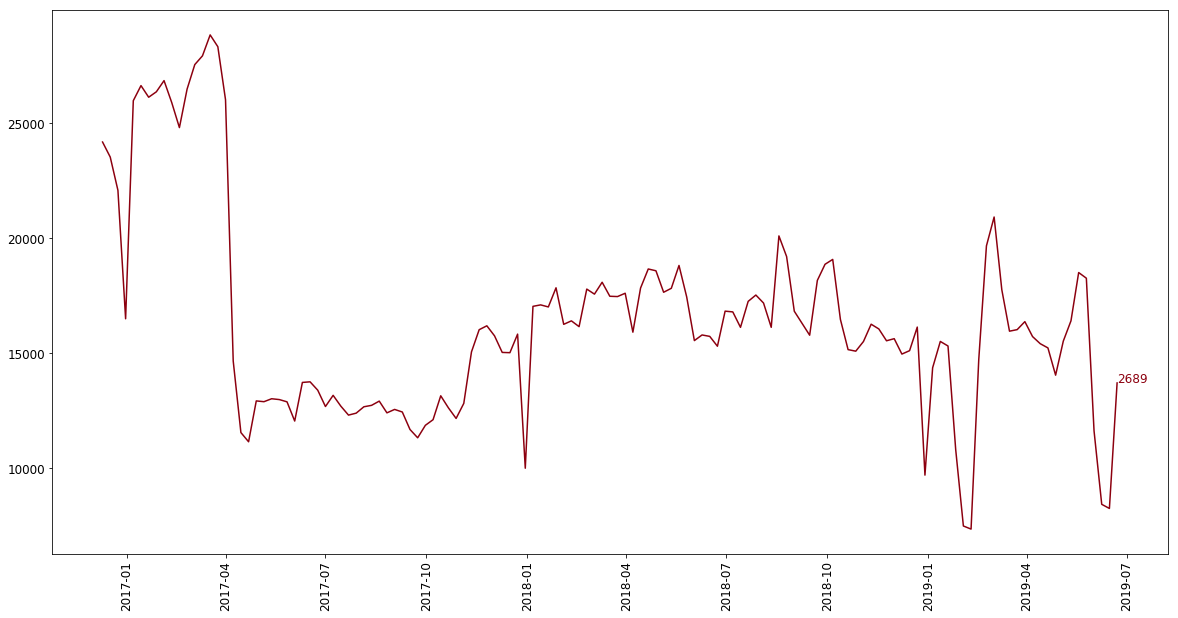

In [27]:
for j in cluster:
    #print (j)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    for i in range(len(j)):
        plt.plot(train[train.sku==j[i]].Date, train[train.sku==j[i]].target,  color=mycolors[i])
        last_x, last_y = train[train.sku==j[i]].Date.values[-1], train[train.sku==j[i]].target.values[-1]
        plt.text(last_x, last_y, str(j[i]), color=mycolors[i])


# Plot clustering using DTW

In [190]:
label_corr=fcluster(z,5,criterion='maxclust') #Cluster with "correlation distance measure"
sku=list((set(train.sku)))

data={'Label': label_corr,
     'Sku':sku}
df_cluster=pd.DataFrame(data, columns=['Label','Sku'])



In [191]:
#Timeseries of 1st cluster
cluster1=df_cluster[df_cluster.Label==1].Sku
cluster1=np.asarray(cluster1)
#2 cluster
cluster2=df_cluster[df_cluster.Label==2].Sku
cluster2=np.asarray(cluster2)
#3 cluster
cluster3=df_cluster[df_cluster.Label==3].Sku
cluster3=np.asarray(cluster3)
#4 cluster
cluster4=df_cluster[df_cluster.Label==4].Sku
cluster4=np.asarray(cluster4)
#
cluster5=df_cluster[df_cluster.Label==5].Sku
cluster5=np.asarray(cluster5)
print (len(cluster1),len(cluster2),len(cluster3),len(cluster4))
cluster=[cluster1,cluster2,cluster3,cluster4,cluster5]
#print(cluster)

6 10 25 1


In [192]:
for j in cluster:
    #print (j)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    for i in range(len(j)):
        plt.plot(train[train.sku==j[i]].Date, train[train.sku==j[i]].target,  color=mycolors[i])
        last_x, last_y = train[train.sku==j[i]].Date.values[-1], train[train.sku==j[i]].target.values[-1]
        plt.text(last_x, last_y, str(j[i]), color=mycolors[i])


AttributeError: 'float' object has no attribute 'sku'

## Analysis of prices trend

In [39]:
seriesP=[]
for i, s in enumerate(set(train.sku)):
    seriesP.append(((train[train.sku==s].price).values))

seriesP=np.asarray(seriesP)

z2= linkage(seriesP,'single',metric='correlation')
print('z1 has %d rows'%(z1.shape[0]))

z1 has 42 rows


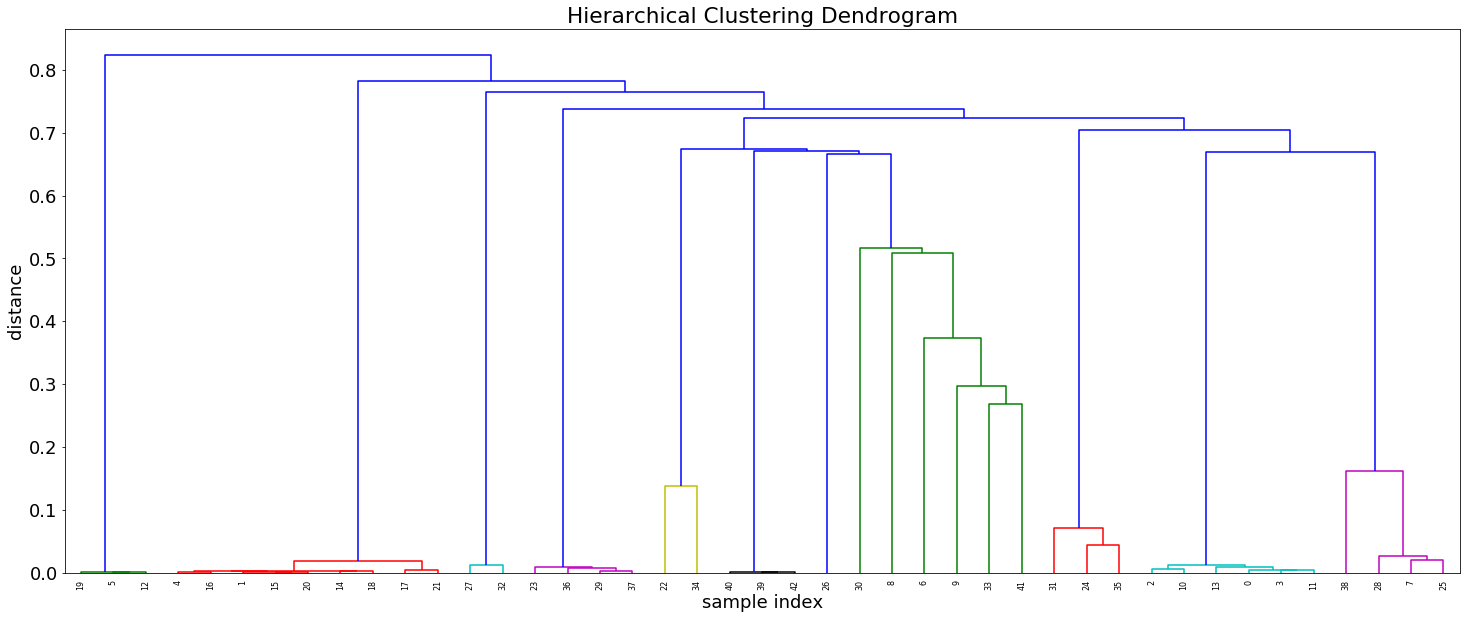

In [40]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z2, 
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.show()

In [41]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z2, k, criterion='maxclust')
    centroids = [np.mean(seriesP[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(seriesP, centroids, 'correlation')
    D = cdist(seriesP, centroids,'correlation')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/seriesP.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(seriesP,metric='correlation')**2)/seriesP.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

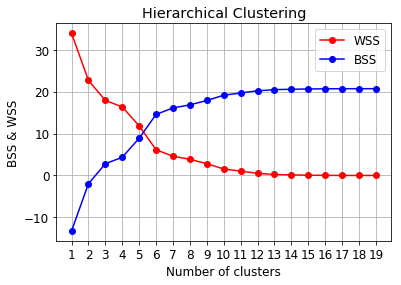

In [42]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

In [61]:
label_corr=fcluster(z2,10,criterion='maxclust')
sku=list((set(train.sku)))

data={'Label': label_corr,
     'Sku':sku}
df_cluster=pd.DataFrame(data, columns=['Label','Sku'])

df_cluster

Label   Sku
0       9  2689
1       2  1027
2       9  2696
3       9  2698
4       2  1035
5       1   144
6       7  2704
7      10  1554
8       7  2705
9       7  2707
10      9  2711
11      9  2712
12      1  1051
13      9  2718
14      2   546
15      2  1058
16      2   549
17      2  1065
18      2   554
19      1   686
20      2   688
21      2  1206
22      5  2360
23      4  2365
24      8  1472
25     10  1600
26      7  1603
27      3  1732
28     10  1608
29      4  2249
30      7  1356
31      8  1618
32      3  1365
33      7  1371
34      5  2396
35      8  1633
36      4  2401
37      4  2410
38     10  1516
39      6  2678
40      6  2681
41      7  2682
42      6  2683

In [65]:
#Timeseries of 1st cluster
cluster1=df_cluster[df_cluster.Label==1].Sku
cluster1=np.asarray(cluster1)
#2 cluster
cluster2=df_cluster[df_cluster.Label==2].Sku
cluster2=np.asarray(cluster2)
#3 cluster
cluster3=df_cluster[df_cluster.Label==3].Sku
cluster3=np.asarray(cluster3)
#4 cluster
cluster4=df_cluster[df_cluster.Label==4].Sku
cluster4=np.asarray(cluster4)
#
cluster5=df_cluster[df_cluster.Label==5].Sku
cluster5=np.asarray(cluster5)
#
cluster6=df_cluster[df_cluster.Label==6].Sku
cluster6=np.asarray(cluster6)

#print (len(cluster1),len(cluster2),len(cluster3),len(cluster4))
cluster=[cluster1, cluster2,cluster3,cluster4,cluster5,cluster6]

In [66]:
print(cluster)

[array([ 144, 1051,  686]), array([1027, 1035,  546, 1058,  549, 1065,  554,  688, 1206]), array([1732, 1365]), array([2365, 2249, 2401, 2410]), array([2360, 2396]), array([2678, 2681, 2683])]


In [67]:
#plt.figure(figsize=(12, 12));



#plt.subplot(330+(k-1))

#plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap('Accent'))
for j in cluster:
    #print (j)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    for i in range(len(j)):
        plt.plot(train[train.sku==j[i]].Date, train[train.sku==j[i]].price,  color=mycolors[i])
        last_x, last_y = train[train.sku==j[i]].Date.values[-1], train[train.sku==j[i]].price.values[-1]
        plt.text(last_x, last_y, str(j[i]), color=mycolors[i])






In [173]:
series_c1=[]

for j in range(len(cluster1)):
    series_c1.append(np.asarray(train[train.sku==cluster1[j]].target))

pearson=[]
for i in range(len(series_c1)):
        for j in range(i+1,len(series_c1)):
            pearson.append(pearsonr(series_c1[i],series_c1[j]))

series_c2=[]            
for j in range(len(cluster2)):
    series_c2.append(np.asarray(train[train.sku==cluster2[j]].target))

pearson2=[]
for i in range(len(series_c2)):
        for j in range(i+1,len(series_c2)):
            pearson2.append(pearsonr(series_c2[i],series_c2[j]))

series_c3=[]
for j in range(len(cluster3)):
    series_c3.append(np.asarray(train[train.sku==cluster3[j]].target))

pearson3=[]
for i in range(len(series_c3)):
        for j in range(i+1,len(series_c3)):
            pearson3.append(pearsonr(series_c3[i],series_c3[j]))
            
series_c4=[]
for j in range(len(cluster4)):
    series_c4.append(np.asarray(train[train.sku==cluster4[j]].target))

pearson4=[]
for i in range(len(series_c4)):
        for j in range(i+1,len(series_c4)):
            pearson4.append(pearsonr(series_c4[i],series_c4[j]))

print(pearson)


[(0.9626780983811745, 3.191374841809152e-76), (0.9856856417482988, 3.671448592552703e-103), (0.9567953588525703, 3.8443346925176627e-72)]


In [38]:
t1=train[train.sku==144].target.values
t2=train[train.sku==1051].target.values
t3=train[train.sku==686].target.values
df1=pd.DataFrame()
df2=pd.DataFrame()
df3=pd.DataFrame()
df4=pd.DataFrame()
#df_['144']=t1
#df_['1051']=t2
#df_['686']=t3
print(cluster1)
for i in cluster1:
    df1[i]=train[train.sku==i].target.values
for i in cluster2:
    df2[i]=train[train.sku==i].target.values
for i in cluster3:
    df3[i]=train[train.sku==i].target.values
for i in cluster4:
    df4[i]=train[train.sku==i].target.values
df=[df1,df2,df3,df4]

[ 144 1051  686]


/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


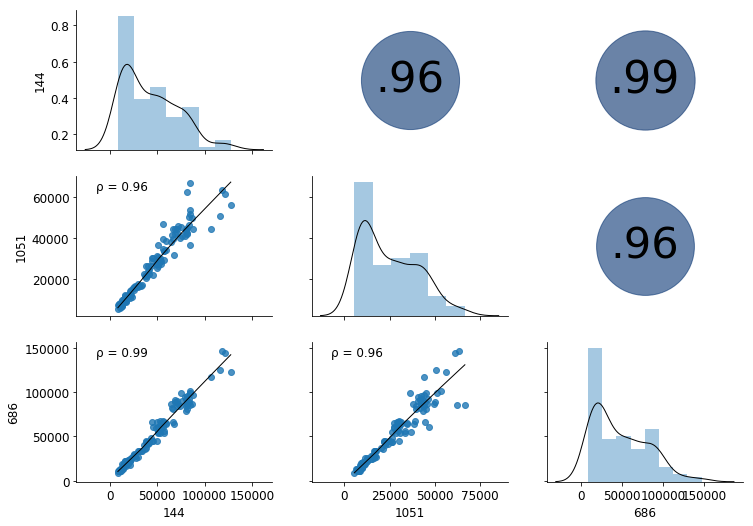

/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/pyth

/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tommaso/anaconda3/lib/pyth

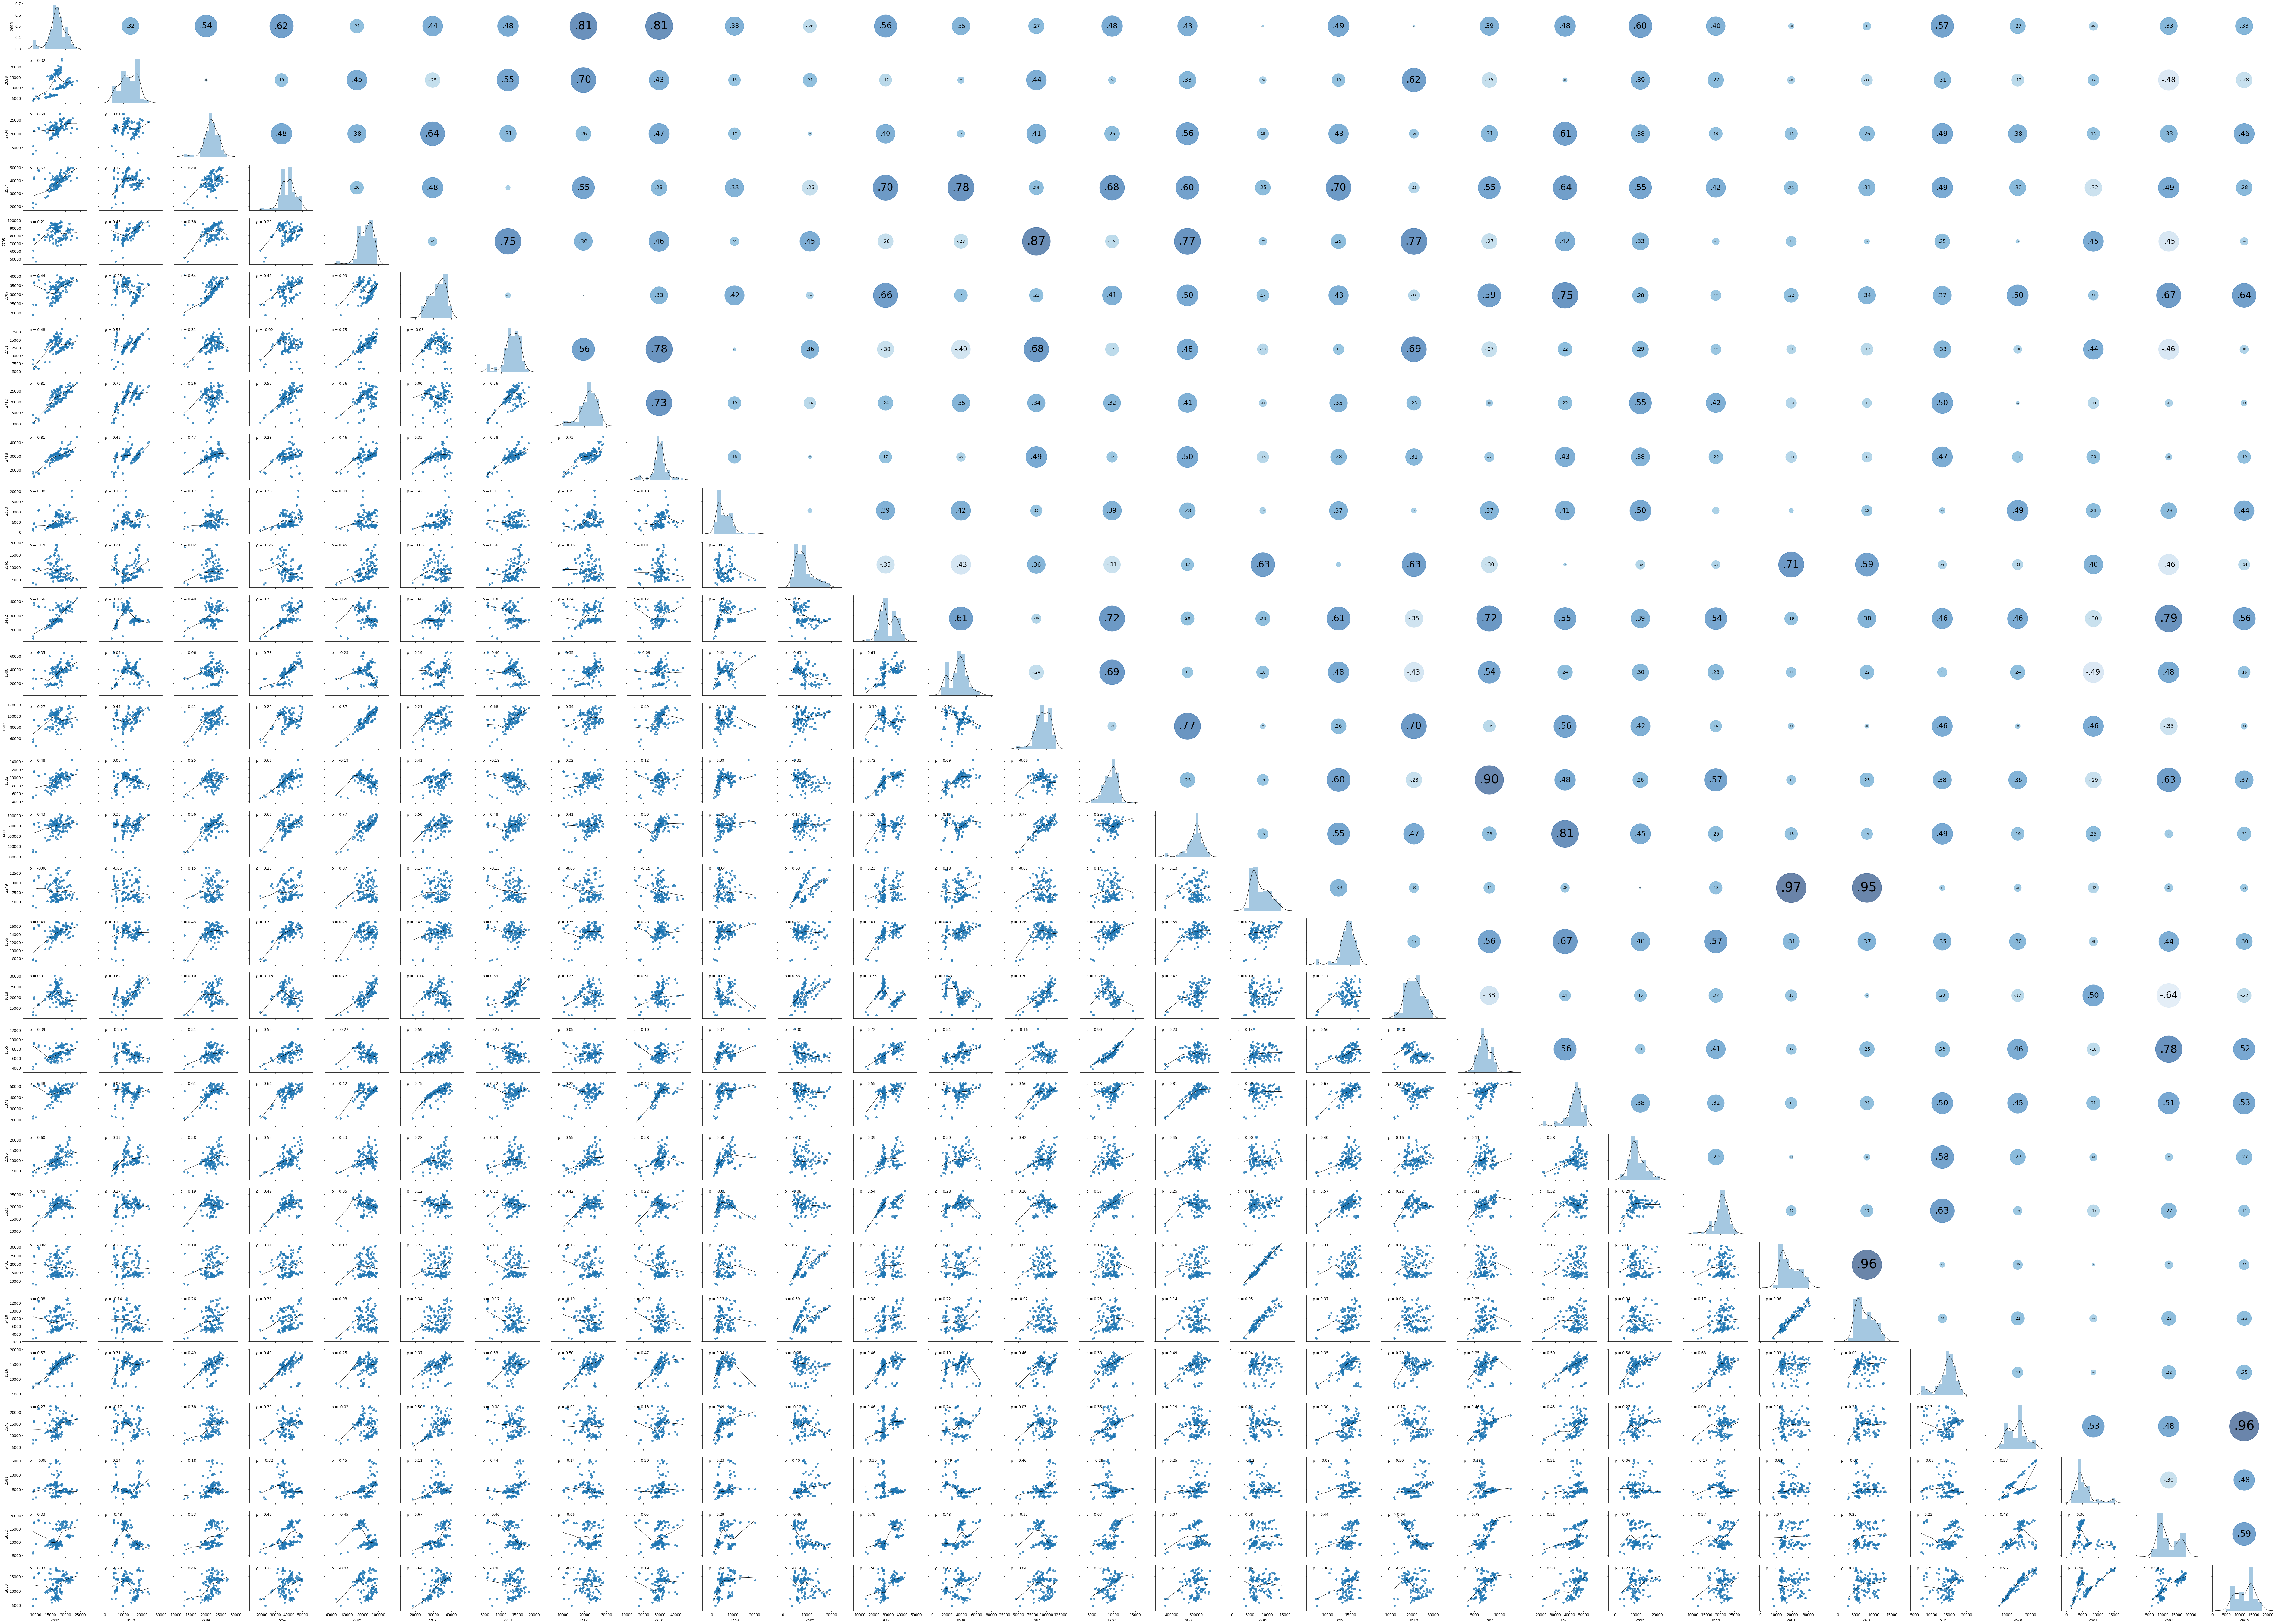

/home/tommaso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


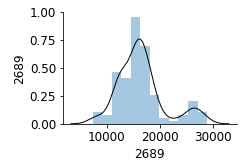

In [39]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
for i in df:
    g = sns.PairGrid(i, aspect=1.4, diag_sharey=False)
    g.map_lower(corrfunc)
    g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
    g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
    g.map_upper(corrdot)
    plt.show()

# Sihlouette

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.26981299296175804
For n_clusters = 3 The average silhouette_score is : 0.22788426319779892
For n_clusters = 4 The average silhouette_score is : 0.3150965796630336
For n_clusters = 5 The average silhouette_score is : 0.22394919843047412
For n_clusters = 6 The average silhouette_score is : 0.19691489223362624


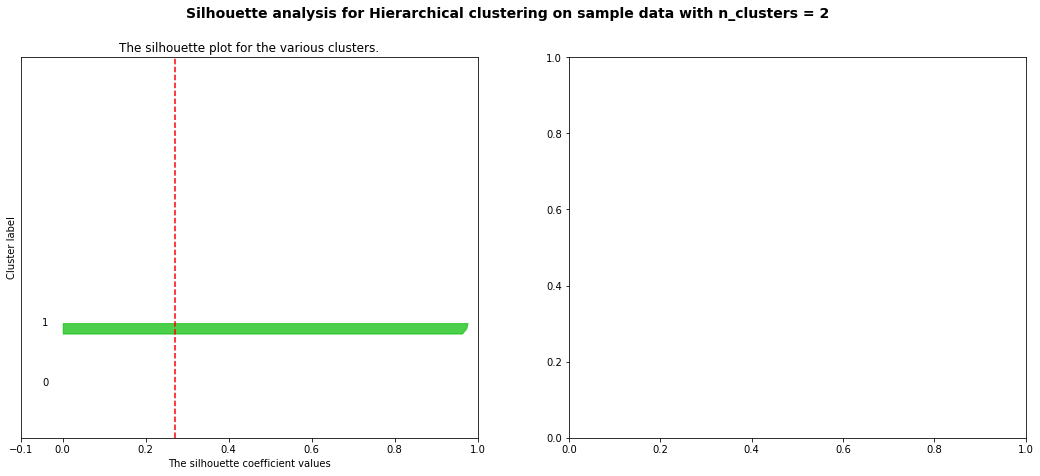

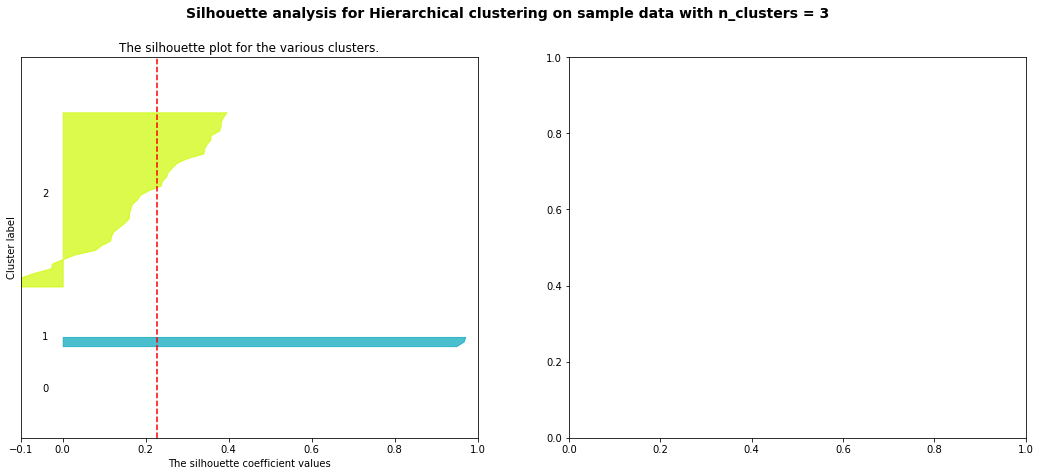

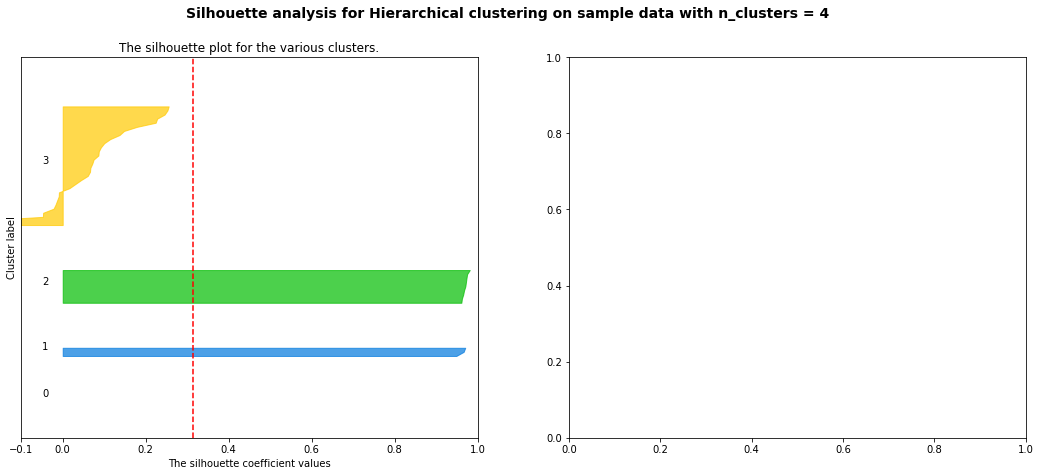

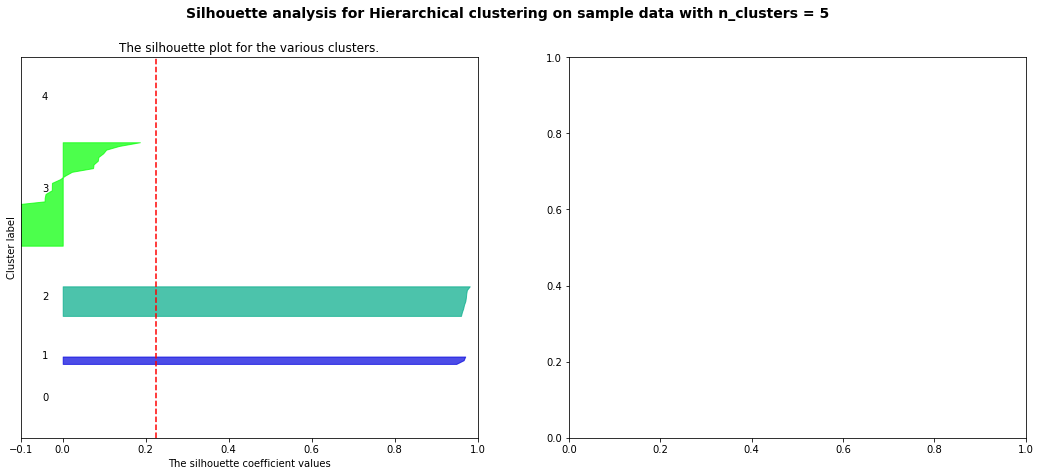

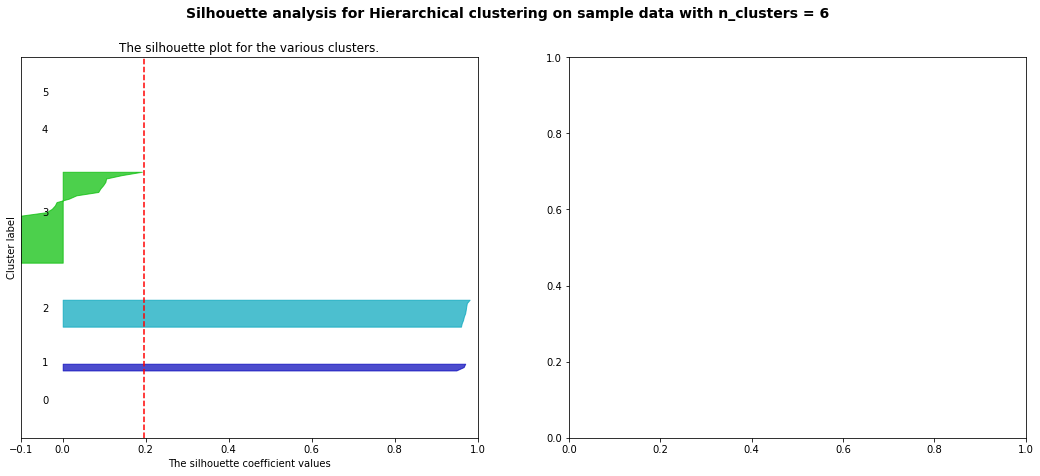

In [28]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np

print(__doc__)



range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(series1) + (n_clusters + 1) * 10])

    cluster_labels=fcluster(z1,n_clusters,criterion='maxclust')
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(series1, cluster_labels,metric='correlation')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(series1, cluster_labels,metric='correlation')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
   

    plt.suptitle(("Silhouette analysis for Hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## New Features

In [253]:
from sklearn.linear_model import LinearRegression
tot_price_wk1=[]
output=[]
sku_list=list(set(train.sku))
sku_list.sort()
#print(sku_list)
for i in sku_list:
    salesW1=np.asarray(train[train.sku==i].salesW_1)
    sales1=[]
    for j in range(1,len(salesW1)):
        sales1.append(salesW1[j])
    sales1=np.asarray(sales1).reshape(-1,1)
    price=np.asarray(train[train.sku==i].price)
    
    price1=(price[0:132]).reshape(-1,1)
    target_X=price[132].reshape(-1,1)
    #print(len(price),len(sales1))
    model=LinearRegression().fit(price1, sales1)
    #print(target_X)
    out=model.predict(target_X)
    output.append(out)
#print(sku_list)
        #print(price,salesW1)
#for sku in train.sku:
#    tot_price_wk1.append((train[train.sku==sku].price)*(train[train.sku==sku]['salesW_1']))
#print(len(tot_price_wk1))
#tot_price_wk1


In [254]:

#dict_output={}
#for i,s in enumerate(set(train.sku)):
#    dict_output.update({i:output[]})
tot_sales=[]
n_price=[]
for i,sku in enumerate(sku_list):
    #print(i,sku_list)
    n_price.append(train[train.sku==sku].price)
    n_sales=np.asarray(train[train.sku==sku].salesW_1)[1:133]
    #print(output[i][0][0])
    tot_sales.append(np.append(n_sales,output[i][0][0]))
    #print(tot_sales)
tot_sales=np.asarray(tot_sales)

n_price=np.asarray(n_price)
#print(tot_sales,n_price)
tot_price_wk=tot_sales*n_price
tot_price_new=[]
for i in tot_price_wk:
    for j in range(len(i)):
        tot_price_new.append(i[j])
        #print(i[j])
    #print(tot_price_wk[i])
#print(len(tot_price_new))
train['tot_cost']=tot_price_new
train
#train[train.sku==144]

#print(n_price,tot_sales)
#print(tot_price_wk)


    

/home/tommaso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date   sku  pack  size (GM)  brand  price  POS_exposedW_1  \
665  2016-12-10   144     0     114.23      1   2.18             NaN   
666  2016-12-17   144     0     114.23      1   2.00            45.0   
667  2016-12-24   144     0     114.23      1   2.05            17.0   
668  2016-12-31   144     0     114.23      1   3.00             2.0   
669  2017-01-07   144     0     114.23      1   2.99             2.0   
670  2017-01-14   144     0     114.23      1   3.00             0.0   
671  2017-01-21   144     0     114.23      1   2.19             0.0   
672  2017-01-28   144     0     114.23      1   2.00            13.0   
673  2017-02-04   144     0     114.23      1   2.00            26.0   
674  2017-02-11   144     0     114.23      1   2.31            37.0   
675  2017-02-18   144     0     114.23      1   3.00            11.0   
676  2017-02-25   144     0     114.23      1   3.00             3.0   
677  2017-03-04   144     0     114.23      1   2.16             0.0   
678  2017-03-11   144     0     114.23      1   2.00            57.0   
679  2017-03-18   144     0     114.23      1   2.00            57.0   
680  2017-03-25   144     0     114.23      1   2.33            52.0   
681  2017-04-01   144     0     114.23      1   3.49             6.0   
682  2017-04-08   144     0     114.23      1   3.49             0.0   
683  2017-04-15   144     0     114.23      1   2.18             0.0   
684  2017-04-22   144     0     114.23      1   2.00            23.0   
685  2017-04-29   144     0     114.23      1   2.00            16.0   
686  2017-05-06   144     0     114.23      1   2.37            11.0   
687  2017-05-13   144     0     114.23      1   3.49             3.0   
688  2017-05-20   144     0     114.23      1   3.48             3.0   
689  2017-05-27   144     0     114.23      1   2.20             0.0   
690  2017-06-03   144     0     114.23      1   2.00            48.0   
691  2017-06-10   144     0     114.23      1   2.00            45.0   
692  2017-06-17   144     0     114.23      1   2.35            56.0   
693  2017-06-24   144     0     114.23      1   3.87             0.0   
694  2017-07-01   144     0     114.23      1   3.88             0.0   
...         ...   ...   ...        ...    ...    ...             ...   
1832 2018-12-01  2718     1     395.41      0   1.10             3.0   
1833 2018-12-08  2718     1     395.41      0   1.10             2.0   
1834 2018-12-15  2718     1     395.41      0   1.10             6.0   
1835 2018-12-22  2718     1     395.41      0   1.10             3.0   
1836 2018-12-29  2718     1     395.41      0   1.11             6.0   
1837 2019-01-05  2718     1     395.41      0   1.11             6.0   
1838 2019-01-12  2718     1     395.41      0   1.10             7.0   
1839 2019-01-19  2718     1     395.41      0   1.11             6.0   
1840 2019-01-26  2718     1     395.41      0   1.29             7.0   
1841 2019-02-02  2718     1     395.41      0   1.54             0.0   
1842 2019-02-09  2718     1     395.41      0   1.53             0.0   
1843 2019-02-16  2718     1     395.41      0   1.10             0.0   
1844 2019-02-23  2718     1     395.41      0   1.00            36.0   
1845 2019-03-02  2718     1     395.41      0   1.00            34.0   
1846 2019-03-09  2718     1     395.41      0   1.05            30.0   
1847 2019-03-16  2718     1     395.41      0   1.11             7.0   
1848 2019-03-23  2718     1     395.41      0   1.11             4.0   
1849 2019-03-30  2718     1     395.41      0   1.11             1.0   
1850 2019-04-06  2718     1     395.41      0   1.11             1.0   
1851 2019-04-13  2718     1     395.41      0   1.11             6.0   
1852 2019-04-20  2718     1     395.41      0   1.11             3.0   
1853 2019-04-27  2718     1     395.41      0   1.11             3.0   
1854 2019-05-04  2718     1     395.41      0   1.11             6.0   
1855 2019-05-11  2718     1     395.41      0   1.1